In [6]:
from functions.Pre_Processing_Casos_Leves import *
from functions.analises import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
casos_leves = Pre_Processing_Casos_Leves()

In [3]:
casos_leves.run(columns_symptoms, columns_to_drop, path)

c:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Codes\functions\Pre_Processing_Casos_Leves.py:76: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_temp = pd.read_csv(filename, index_col=None, header=0,sep=';',decimal=',')
c:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Codes\functions\Pre_Processing_Casos_Leves.py:76: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_temp = pd.read_csv(filename, index_col=None, header=0,sep=';',decimal=',')
c:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Codes\functions\Pre_Processing_Casos_Leves.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column][i] = 1


In [4]:
df = casos_leves.df
df

,sexo,data_notificacao,idade,data_inicio_sintomas,sintomas,outros_sintomas,classificacao_final,resultado_final,bairro,SYMPTOM_COUGH,...,SYMPTOM_BODY_PAIN,SYMPTOM_DIARRHEA,SYMPTOM_RUNNY_NOSE,SYMPTOM_NOSE_CONGESTION,SYMPTOM_WEAKNESS,SYMPTOM_ANOSMIA_OR_HYPOSMIA,SYMPTOM_NAUSEA,SYMPTOM_LACK_OF_APPETITE,SYMPTOM_ABDOMINAL_PAIN,SYMPTOM_CONSCIOUSNESS_DEGRADATION
0,1,2020-01-12,28,2020-01-12,[ASSINTOMÁTICO],[],7,4,SANCHO,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2020-01-20,36,2020-01-20,[ASSINTOMÁTICO],[],7,2,ROSARINHO,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2020-01-20,45,2020-01-20,[ASSINTOMÁTICO],[],7,2,CASA AMARELA,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2020-01-20,58,2020-01-20,[ASSINTOMÁTICO],[],7,2,ROSARINHO,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2020-01-22,33,2020-01-22,[ASSINTOMÁTICO],[],7,2,IPUTINGA,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889840,0,2022-01-23,27,2022-01-23,[OUTROS],[PRÉ-CIRÚRGICO],7,4,CAMPO GRANDE,0,...,0,0,0,0,0,0,0,0,0,0
889841,1,2022-01-23,26,2022-01-23,[OUTROS],[PRÉ-CIR´ÚRGICO],7,4,IBURA,0,...,0,0,0,0,0,0,0,0,0,0
889842,0,2022-01-23,38,2022-01-23,[ASSINTOMÁTICO],[0],7,4,COHAB,0,...,0,0,0,0,0,0,0,0,0,0
889843,0,2022-01-23,26,2022-01-16,"[CORIZA, DOR DE CABEÇA, DOR DE GARGANTA, TOSSE]",[0],7,4,POCO,1,...,0,0,1,0,0,0,0,0,0,0


In [10]:
df.to_csv('df_casos_leves')

In [7]:
analises = analises()

In [8]:
analises.run_leves(df)
df2 = analises.df2
df2

,Sintoma,Count,percentage
0,SYMPTOM_COUGH,310080,34.846518
1,SYMPTOM_COLD,7574,0.851159
2,SYMPTOM_AIR_INSUFFICIENCY,75339,8.466531
3,SYMPTOM_FEVER,210043,23.604448
4,SYMPTOM_LOW_OXYGEN_SATURATION,29,0.003259
5,SYMPTOM_BREATHING_CONDITION,1797,0.201945
6,SYMPTOM_TORACIC_APERTURE,1463,0.164411
7,SYMPTOM_THROAT_CONDITION,242127,27.210020
8,SYMPTOM_HEADACHE,11931,1.340795
9,SYMPTOM_BODY_PAIN,49695,5.584680


Análises gráficas quantitativa dos sintomas


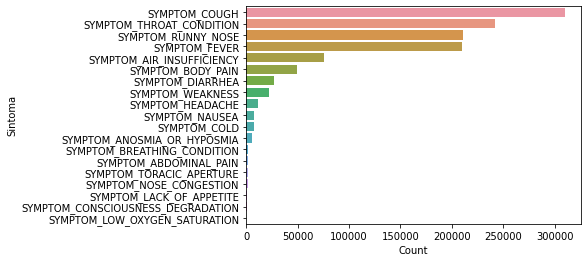

In [9]:
analises.plot_data_sintomas()